## _Topic Modeling based on Reviews_
***
<b>DESCRIPTION</b>

You are asked to analyze customer reviews from an e-commerce platform. More specifically, you will perform topic modeling to identify common themes in the reviews, apply POS tagging to extract grammatical information and utilize lemmatization to normalize the words for better
analysis.

<b>Problem Statement: </b>

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

<b>Domain: Amazon reviews for a leading phone brand</b>

- Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

<b> Content: </b>

- Dataset: ‘K8 Reviews v0.2.csv’

<b>Columns:</b>
- Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
- Reviews: The main text of the review

<b>Steps to perform:</b>

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.
Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. 

<b>Tasks: </b>
- Read the .csv file using Pandas. Take a look at the top few records.
- Normalize casings for the review text and extract the text into a list for easier manipulation.
- Tokenize the reviews using NLTKs word_tokenize function.
- Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
- For the topic model, we should  want to include only nouns.
- Find out all the POS tags that correspond to nouns.
- Limit the data to only terms with these tags.
- Lemmatize. 
- Different forms of the terms need to be treated as one.
- No need to provide POS tag to lemmatizer for now.
- Remove stopwords and punctuation (if there are any). 
- Create a topic model using LDA on the cleaned up data with 12 topics.
- Print out the top terms for each topic.
- What is the coherence of the model with the c_v metric?
- Analyze the topics through the business lens.
- Determine which of the topics can be combined.
- Create topic model using LDA with what you think is the optimal number of topics
- What is the coherence of the model?
- Create a table with the topic name and the top 10 terms in each to present to the  business.



In [1]:
# write the list of necessary packages here:
!pip install pandas
!pip install nltk
!pip install spacy
!pip install scikit-learn
!pip install gensim
!pip install matplotlib
!pip install seaborn
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## _Import Libraries and Load the Data_

In [2]:
# import your packages here:
import numpy as np
import pandas as pd
#file and system operations
import os
import sys
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from wordcloud import WordCloud

### _Load the Reviews Data_

In [3]:
reviews = pd.read_csv("K8 Reviews v0.2.csv", delimiter=",")
reviews.head(3)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...


In [4]:
# check the number of reviews
len(reviews)

14675

In [5]:
# check the basic info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


- _There are no null values or missing values in the dataset_

In [6]:
# check the sentiment labels
reviews["sentiment"].value_counts()

sentiment
0    7712
1    6963
Name: count, dtype: int64

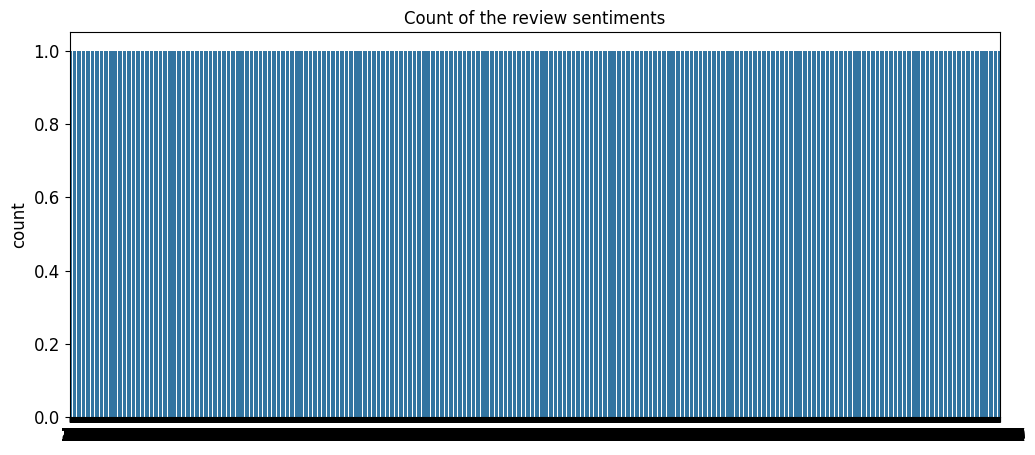

In [7]:
sns.countplot(reviews["sentiment"])
plt.title("Count of the review sentiments")
plt.show()

- _The data seems to be fairly balanced. However, the objective of this project is to do topic modeling and not sentiment classification_

## _Text Preprocessing_
_Following steps will be performed_
- Tokenization - Split the text into sentences and sentences into words. Lowercase the words and remove any punctuation_
- All stopwords will be removed_
- Eliminate the tokens except nouns, noun phrases and verbs.
- Words are lemmatized - words in third person are changed to first person and words in future and past tense are changed to present tense_

In [8]:
nltk.download("punkt")  # Tokenizers
nltk.download("stopwords")  # Stopwords corpus
nltk.download("averaged_perceptron_tagger_eng")  # POS tagger
nltk.download("wordnet")  # WordNet lemmatizer
nltk.download("omw-1.4")  # WordNet data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\meric\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\meric\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\meric\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
# 1- Tokenization:
def tokenize_text(text):
    """
    Split text into sentences, then split each sentence into words, lowercase the words and remove punctuation.

    Parameters:
    - text: str, input text

    Returns:
    - list of tokens
    """
    sentences = sent_tokenize(text)
    words = []

    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tokens = [word.lower() for word in tokens if word.isalpha()]
        words.extend(tokens)
    return words


reviews["Tokenized_Reviews"] = reviews["review"].apply(tokenize_text)
# check the tokenized reviews
reviews["Tokenized_Reviews"].head(5)

0        [good, but, need, updates, and, improvements]
1    [worst, mobile, i, have, bought, ever, battery...
2    [when, i, will, get, my, cash, back, its, alre...
3                                               [good]
4    [the, worst, phone, everthey, have, changed, t...
Name: Tokenized_Reviews, dtype: object

In [ ]:
# 2- Remove stop words
stop_words = set(stopwords.words("english"))
# see example of stop words
print(list(stop_words)[:10])


def remove_stopwords(tokens):
    """
    Remove stopwords from a list of tokens using the NLTK stopwords corpus.

    Parameters:
    - tokens: list of strings

    Returns:
    - list of strings (tokens with stopwords removed)
    """
    return [word for word in tokens if word not in stop_words]


reviews["Cleaned_Tokens"] = reviews["Tokenized_Reviews"].apply(remove_stopwords)
# check the cleaned tokens
reviews["Cleaned_Tokens"].head(5)

['so', 'now', 'if', 'below', 'he', 'ourselves', 'was', "you're", 'what', 'myself']


0                  [good, need, updates, improvements]
1    [worst, mobile, bought, ever, battery, drainin...
2                  [get, cash, back, already, january]
3                                               [good]
4    [worst, phone, everthey, changed, last, phone,...
Name: Cleaned_Tokens, dtype: object

In [20]:
# 3- Eliminate tokens except for nouns, noun phrases, and verbs
def pos_filter(tokens):
    """
    Only keep nouns, noun phrases, and verbs.

    Parameters:
    - tokens: list of strings to filter

    Returns:
    - filtered_tokens: list of strings containing only nouns, noun phrases, and verbs
    """
    pos_tags_to_keep = [
        "NN",
        "NNS",
        "NNP",
        "NNPS",
        "VB",
        "VBD",
        "VBG",
        "VBN",
        "VBP",
        "VBZ",
    ]
    pos_tags = nltk.pos_tag(tokens)
    filtered_tokens = [word for word, pos in pos_tags if pos in pos_tags_to_keep]
    return filtered_tokens


reviews["POS_Filtered_Tokens"] = reviews["Cleaned_Tokens"].apply(pos_filter)
# check the POS filtered tokens
print(reviews["POS_Filtered_Tokens"].head(5))

0                        [need, updates, improvements]
1    [mobile, bought, draining, hell, backup, hours...
2                                          [get, cash]
3                                                   []
4    [phone, everthey, changed, phone, problem, ama...
Name: POS_Filtered_Tokens, dtype: object


In [22]:
# 4- Lemmatize the tokens

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(pos_tag):
    """
    Map POS tag to first character lemmatize() accepts

    Parameters:
    - pos_tag: string (POS tag)

    Returns:
    - wordnet_pos: string (WordNet POS tag)
    """
    if pos_tag.startswith("J"):
        return wordnet.ADJ
    elif pos_tag.startswith("V"):
        return wordnet.VERB
    elif pos_tag.startswith("N"):
        return wordnet.NOUN
    elif pos_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lemmatize_tokens(tokens):
    """
    Lemmatize the tokens using the WordNet lemmatizer.

    Parameters:
    - tokens: list of strings

    Returns:
    - lemmatized_tokens: list of strings
    """
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = []

    for word, pos in pos_tags:
        wordnet_pos = get_wordnet_pos(pos)
        lemmatized_token = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens


reviews["Lemmatized_Tokens"] = reviews["POS_Filtered_Tokens"].apply(lemmatize_tokens)
# check the lemmatized tokens
print(reviews["Lemmatized_Tokens"].head(5))

0                          [need, update, improvement]
1    [mobile, buy, drain, hell, backup, hour, inter...
2                                          [get, cash]
3                                                   []
4    [phone, everthey, change, phone, problem, amaz...
Name: Lemmatized_Tokens, dtype: object


In [23]:
# Testing what has been done so far
for index, row in reviews.head().iterrows():
    print(f"Original Review {index+1}: {row['review']}")
    print(f"Lemmatized Tokens {index+1}: {row['Lemmatized_Tokens']}\n")

Original Review 1: Good but need updates and improvements
Lemmatized Tokens 1: ['need', 'update', 'improvement']

Original Review 2: Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.
Lemmatized Tokens 2: ['mobile', 'buy', 'drain', 'hell', 'backup', 'hour', 'internet', 'us', 'put', 'get', 'lie', 'amazon', 'lenove', 'expect', 'make', 'say', 'battery', 'booster', 'charger', 'fake', 'take', 'hour', 'know', 'make', 'go', 'regret']

Original Review 3: when I will get my 10% cash back.... its already 15 January..
Lemmatized Tokens 3: ['get', 'cash']

Original Review 4: Good


Seems to be working good.

### Topic Modeling

Implement topic modeling using Latent Dirichlet Allocation (LDA) which is a topic modeling technique for uncovering the central topics and their distributions across a set of documents. Identify and list the top 5 topics found in the reviews along with their associated keywords.

In [27]:
texts = reviews["Lemmatized_Tokens"].tolist()
dictionary = corpora.Dictionary(texts)

# remove very rare and very common words
dictionary.filter_extremes(no_below=5, no_above=0.25)

corpus = [dictionary.doc2bow(text) for text in texts]

In [28]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    Compute c_v coherence for various numbers of topics.

    Parameters:
    - dictionary: Gensim dictionary
    - corpus: Gensim corpus
    - texts: List of input texts
    - start: Minimum number of topics
    - limit: Maximum number of topics
    - step: Step size for the number of topics

    Returns:
    - model_list: List of LDA topic models
    - coherence_values: Coherence values corresponding to the LDA models
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            alpha="auto",
            eta="auto",
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

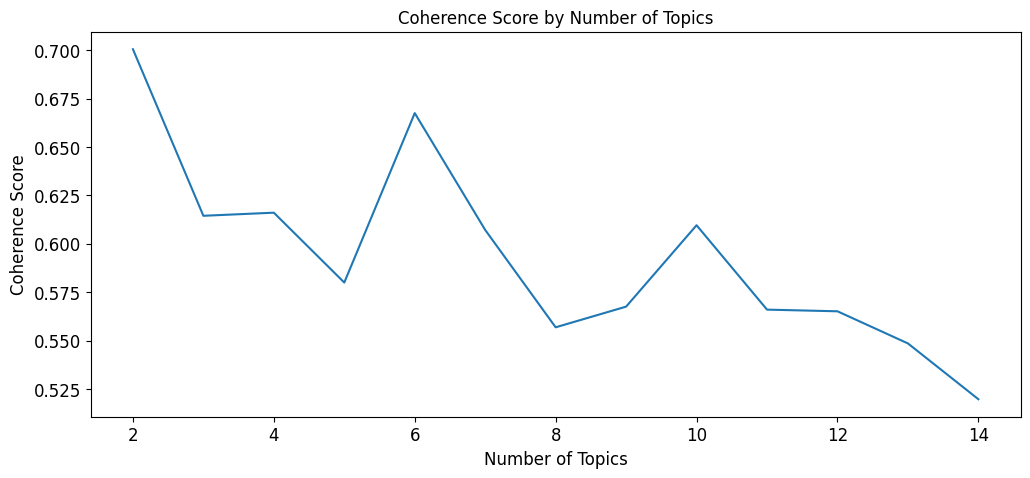

In [29]:
start = 2  # Minimum number of topics
limit = 15  # Maximum number of topics
step = 1  # Step size

# Compute coherence values
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=texts,
    start=start,
    limit=limit,
    step=step,
)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()

As seen from the graph, the best number of topics is 2, but that is a bit too small, so we will go with next best number of topics which is 6.

In [30]:
optimal_num_topics = 6
lda_model_optimal = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=optimal_num_topics,
    random_state=42,  # for reproducibility
    passes=10,
    alpha="auto",
    eta="auto",
)

In [31]:
coherence_model_lda_optimal = CoherenceModel(
    model=lda_model_optimal, texts=texts, dictionary=dictionary, coherence="c_v"
)
coherence_lda_optimal = coherence_model_lda_optimal.get_coherence()
print(f"Optimal Model Coherence Score: {coherence_lda_optimal:.4f}")

Optimal Model Coherence Score: 0.6676


In [32]:
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df_list = []

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        topic_num, prop_topic = row[0]
        wp = ldamodel.show_topic(topic_num, topn=10)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df_list.append(
            [int(topic_num), round(prop_topic, 4), topic_keywords]
        )

    sent_topics_df = pd.DataFrame(
        sent_topics_df_list,
        columns=["Dominant_Topic", "Topic_Perc_Contrib", "Topic_Keywords"],
    )

    contents = pd.Series(texts).reset_index(drop=True)
    sent_topics_df = pd.concat(
        [sent_topics_df.reset_index(drop=True), contents], axis=1
    )
    sent_topics_df.columns = [
        "Dominant_Topic",
        "Topic_Perc_Contrib",
        "Topic_Keywords",
        "Review",
    ]
    return sent_topics_df

In [33]:
df_topic_sents_keywords = format_topics_sentences(
    ldamodel=lda_model_optimal, corpus=corpus, texts=reviews["review"]
)

df_topic_sents_keywords.columns = [
    "Dominant_Topic",
    "Topic_Perc_Contrib",
    "Topic_Keywords",
    "Review",
]

grouped_df = df_topic_sents_keywords.groupby("Dominant_Topic")

for topic_num, group in grouped_df:
    print(f"\n---\nTopic {int(topic_num)+1}: {group['Topic_Keywords'].iloc[0]}\n")
    print(f"Number of Reviews: {len(group)}\n")
    sample_reviews = group["Review"].head(1).tolist()
    for review in sample_reviews:
        print(f"Sample Review :\n{review}\n")


---
Topic 1: charge, heat, battery, get, use, issue, work, day, time, drain

Number of Reviews: 3213

Sample Review :
Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.


---
Topic 2: note, work, camera, speaker, sound, mode, feature, compare, expect, music

Number of Reviews: 1229

Sample Review :
Good but need updates and improvements


---
Topic 3: mobile, money, waste, value, hai, glass, h, ok, gorilla, box

Number of Reviews: 765

Sample Review :
Wrost


---
Topic 4: problem, call, network, heating, issue, support, sim, service, show, lenovo

Number of Reviews: 1

### Reporting

Summarizing the findings, including:
• How did you select the number of topics?
• Coherence score measures how semantically related the top words are in each topic.
Which coherence type did you employ (c v, u mass or uci)?
• The most common topics identified in the reviews.
• Print examples of reviews that belong to each topic.

## Summary

- I selected the optimal number of topics by looping from 2 topics to 15 topics, and calculating seperate coherence scores for each number of topics. The best number of topics was 2, but that was too small, so I went with the next best number of topics which was 6.

- I employed the c_v coherence type, because it is a sliding window based coherence measure based on one-set segmentation of top words. It is suitable for evaluating topic models with human interpretability.

- The most common topics were:

1. Battery, Charging, and Heating Issues

2. Product Quality and Features (and possibly comparison with other products)

3. Value for Money

4. Software and Performance Issues

5. Specifications and Camera Quality

6. Customer Service Related Issues

- From the extracted example reviews, it is clear that the topics are well defined and the model has done a good job in identifying the topics.

- For further improvements, we may work on fixing typos and removing the non-english words (there are many Indian words in the reviews) to improve the quality of the topics.

- The overal coherence of the model is around 67%, which is a good score, but can be improved further by working on the above mentioned points.

### Visualization

Plot word clouds for each topic displaying associated keywords

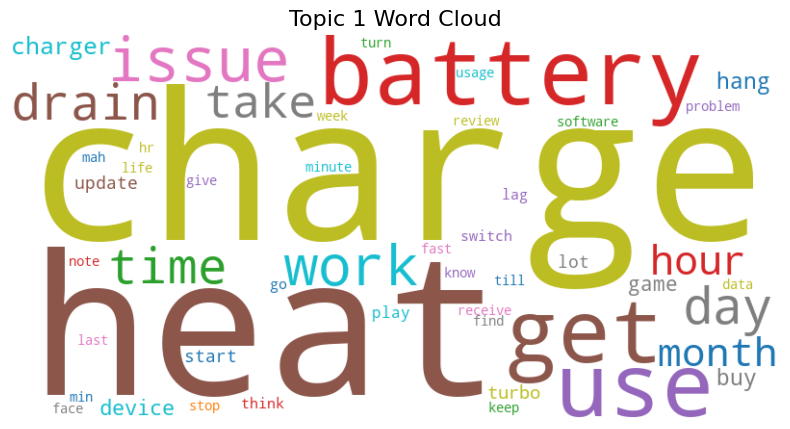

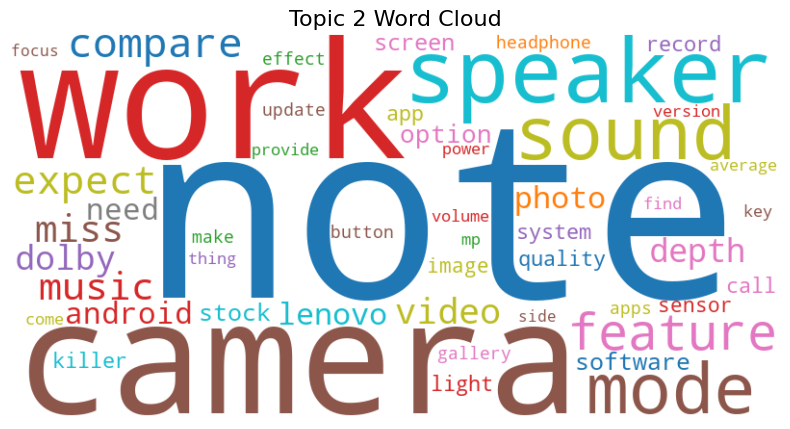

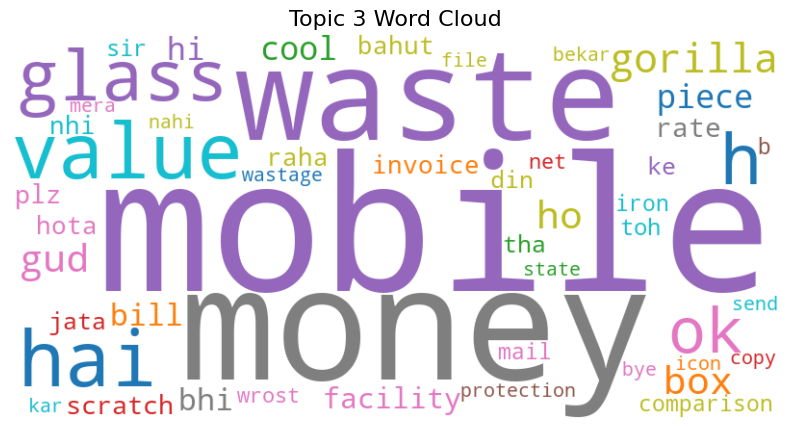

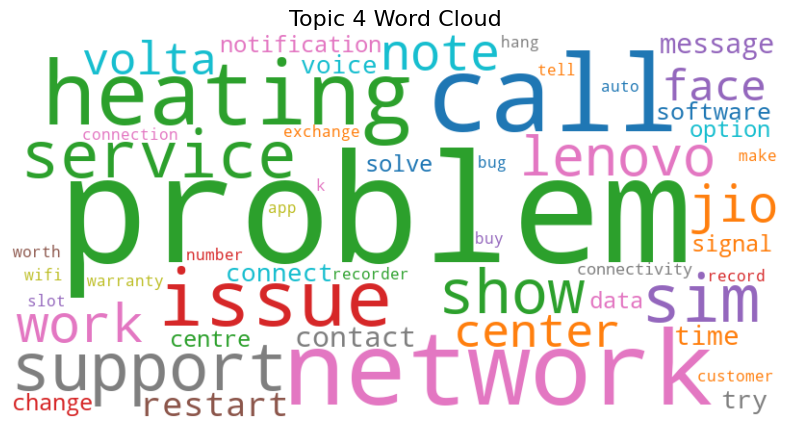

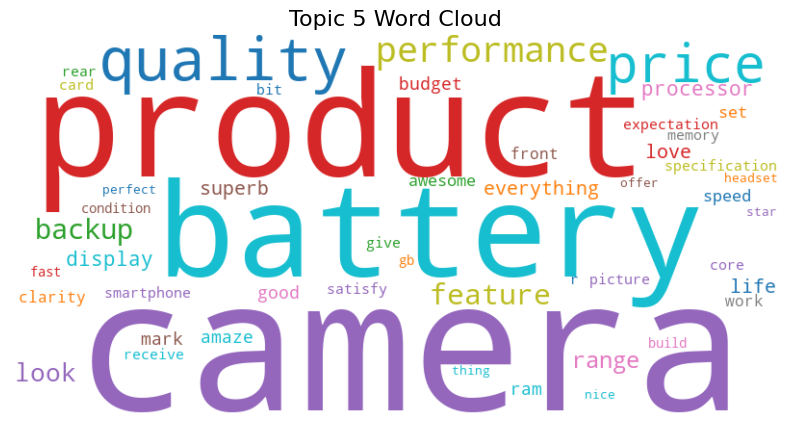

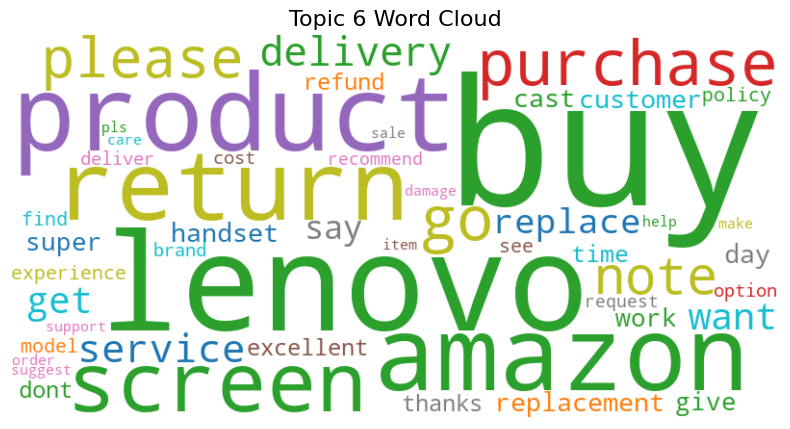

In [34]:
# write your code here:


def plot_word_cloud(lda_model, topic_num):
    topic = lda_model.show_topic(topic_num, topn=50)
    topic_words = {word: weight for word, weight in topic}
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="tab10",
        max_words=50,
        prefer_horizontal=1.0,
    ).generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_num+1} Word Cloud", fontsize=16)
    plt.show()


for t in range(lda_model_optimal.num_topics):
    plot_word_cloud(lda_model_optimal, t)